# Sales Prediction Using Python

Sales prediction involves forecasting product demand by analyzing factors like advertising expenditure, target audience segmentation, and advertising platform selection. Data Scientists play a crucial role in predicting future sales using machine learning in Python. They analyze data to make informed decisions on advertising costs, optimizing strategies to maximize sales potential. Let's explore sales prediction using machine learning in Python.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [61]:
data=pd.read_csv("C:\\Users\\Dell Latitude 3410\\Downloads\\advertising.csv")

In [62]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [63]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [64]:
data.shape

(200, 4)

In [65]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [67]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [68]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [69]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [70]:
data['Sales']

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

# Data Visualization

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

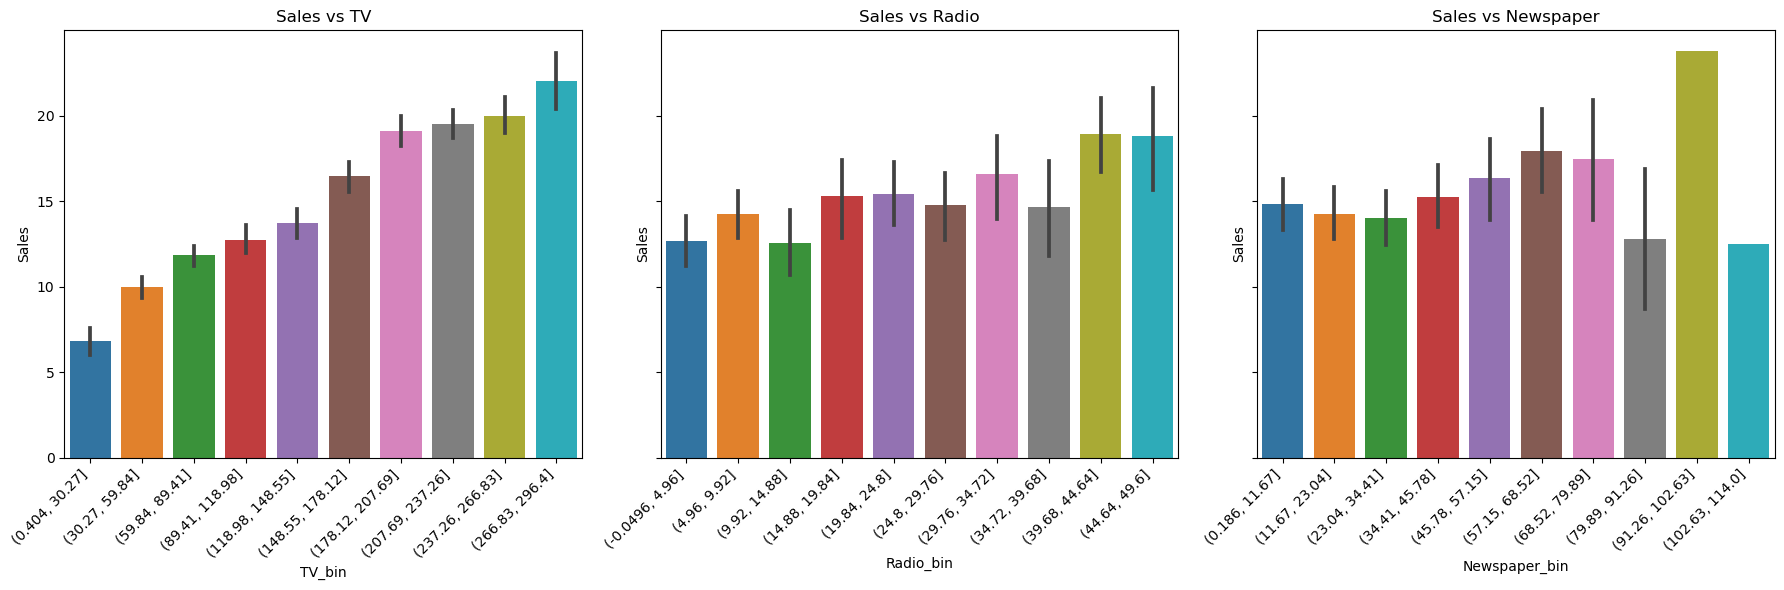

In [71]:
# Create bins for the advertising budgets
data['TV_bin'] = pd.cut(data['TV'], bins=10)
data['Radio_bin'] = pd.cut(data['Radio'], bins=10)
data['Newspaper_bin'] = pd.cut(data['Newspaper'], bins=10)

# Plot the bar plots for each advertising medium
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.barplot(x='TV_bin', y='Sales', data=data, ax=axes[0])
axes[0].set_title('Sales vs TV')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x='Radio_bin', y='Sales', data=data, ax=axes[1])
axes[1].set_title('Sales vs Radio')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x='Newspaper_bin', y='Sales', data=data, ax=axes[2])
axes[2].set_title('Sales vs Newspaper')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


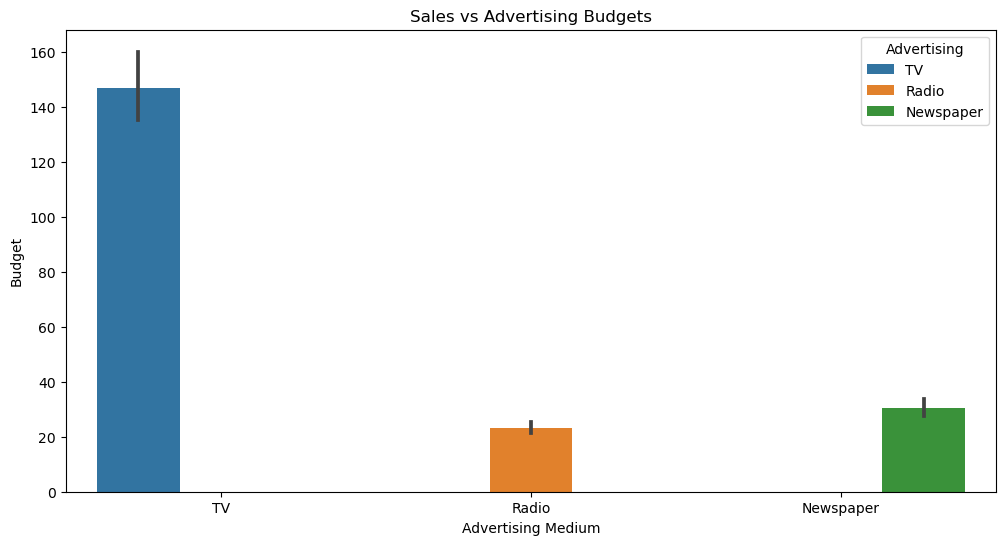

In [72]:
# Assuming df is your original dataframe
# Reshape the dataframe to long format
df_long = pd.melt(data, id_vars='Sales', value_vars=['TV', 'Radio', 'Newspaper'],
                  var_name='Advertising', value_name='Budget')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Advertising', y='Budget', hue='Advertising', data=df_long)
plt.title('Sales vs Advertising Budgets')
plt.ylabel('Budget')
plt.xlabel('Advertising Medium')
plt.show()


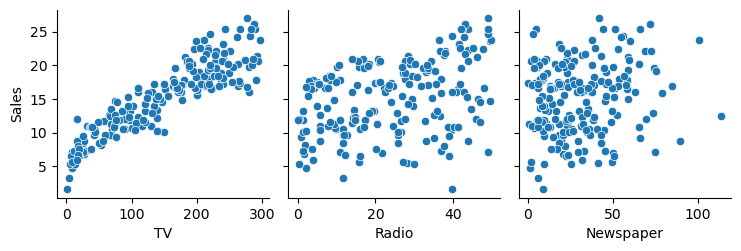

In [73]:
sns.pairplot(data, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="scatter")


# Statistical Analysis


In [74]:
# Assuming df is your dataframe
# Display descriptive statistics
print(data.describe())


               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [75]:
# Ensure all columns are numeric
data = data[['TV', 'Radio', 'Newspaper', 'Sales']].apply(pd.to_numeric, errors='coerce')

# Check for any non-numeric columns
print(data.dtypes)

# Drop rows with any NaN values (if necessary)
data = data.dropna()


TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


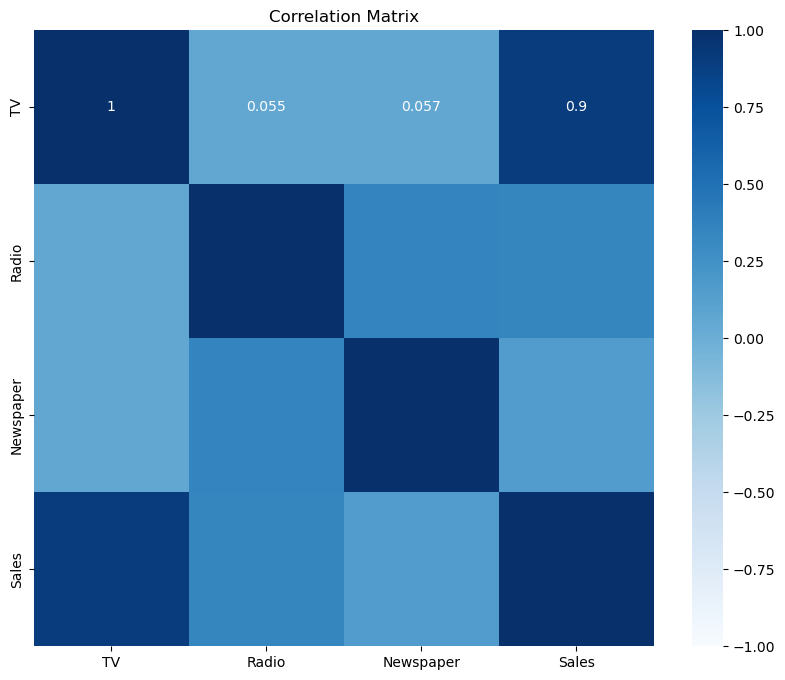

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [77]:
import statsmodels.api as sm

# Define the dependent and independent variables
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           8.13e-99
Time:                        14:06:09   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

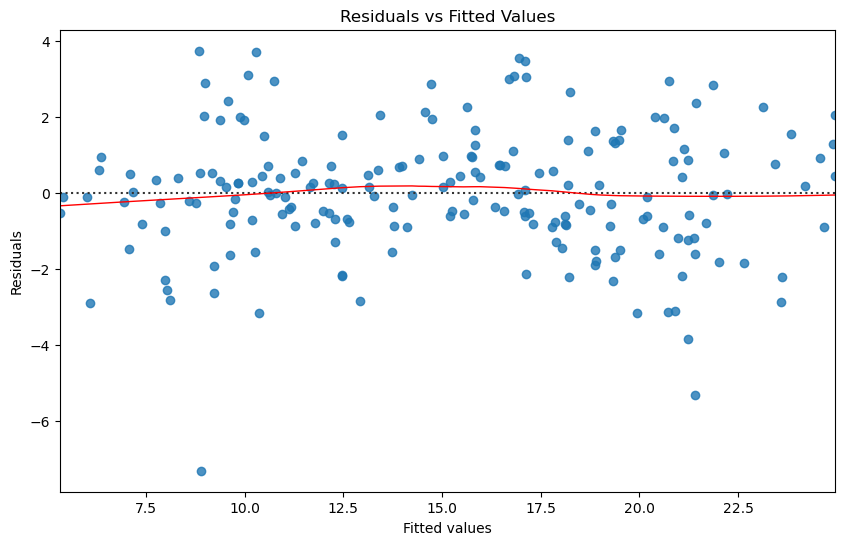

In [78]:
# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


# Built and Train the Model

In [79]:
# Define the features and the target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']


In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Print the training and testing values
print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

X_train:
        TV  Radio  Newspaper
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6
..     ...    ...        ...
106   25.0   11.0       29.7
14   204.1   32.9       46.0
92   217.7   33.5       59.0
179  165.6   10.0       17.6
102  280.2   10.1       21.4

[160 rows x 3 columns]

X_test:
        TV  Radio  Newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2
115   75.1   35.0       52.7
69   216.8   43.9       27.2
170   50.0   11.6       18.4
174  222.4    3.4       13.1
45   175.1   22.5       31.5
66    31.5   24.6        2.2
182   56.2    5.7       29.7
165  234.5    3.4       84.8
78     5.4   29.9        9.4
186  139.5    2.1       26.6
177  170.2    7.8       35.2
56     7.3   28.1       41.4
152  197.6   23.3       14.2
82    75.3   20.3       32.5
68   237.4   27.5       11.0
1

In [82]:
print(X.shape, X_train.shape, X_test.shape)

(200, 3) (160, 3) (40, 3)


In [83]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [85]:
rf_model = RandomForestRegressor(random_state=42)

In [86]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [87]:
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, random_state=42, scoring='neg_mean_squared_error')
random_search.fit(X_train_scaled, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [88]:
best_rf_model = random_search.best_estimator_

In [89]:
y_train_pred = best_rf_model.predict(X_train_scaled)
y_test_pred = best_rf_model.predict(X_test_scaled)


In [90]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [91]:
print(f'Training Mean Squared Error: {train_mse}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Training R^2 Score: {train_r2}')
print(f'Testing R^2 Score: {test_r2}')


Training Mean Squared Error: 0.2312443646977293
Testing Mean Squared Error: 1.4563654003469324
Training R^2 Score: 0.9913712775738865
Testing R^2 Score: 0.9528701114087547


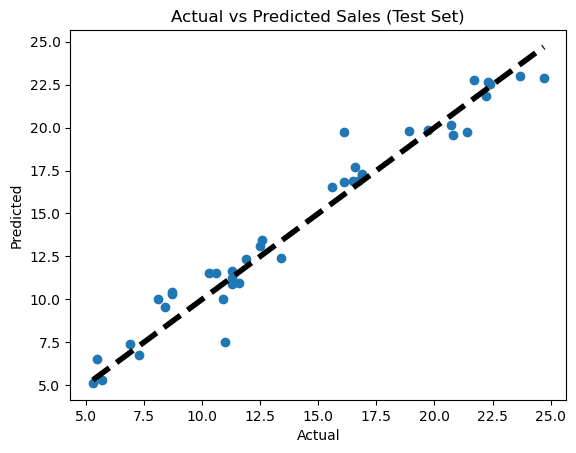

In [92]:
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales (Test Set)')
plt.show()

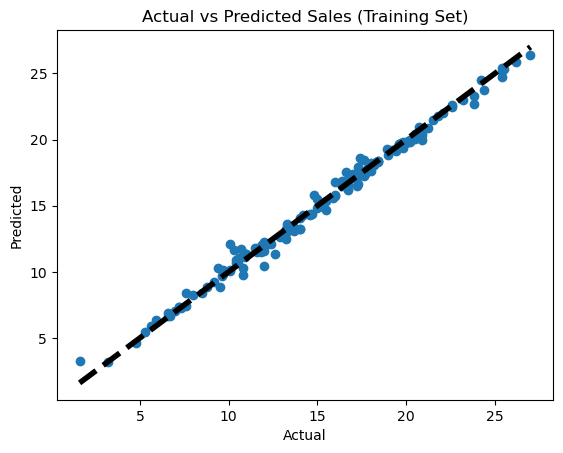

In [93]:
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales (Training Set)')
plt.show()

In [94]:
# New data for future prediction
new_data = pd.DataFrame({
    'TV': [150, 230, 50],
    'Radio': [22, 37, 15],
    'Newspaper': [85, 69, 50]
})

In [95]:
new_data_scaled = scaler.transform(new_data)

In [96]:
future_sales_pred = best_rf_model.predict(new_data_scaled)

In [98]:
print("Predicted Sales for New Data:")
print(future_sales_pred)

Predicted Sales for New Data:
[14.8475     21.76654167  9.781     ]


In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score


In [100]:
acc1=accuracy_score(y_test,predictions)
print(acc1)

NameError: name 'predictions' is not defined

In [101]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

NameError: name 'y_pred' is not defined